In [34]:
import fem2d as fem
import numpy as np
from scipy.linalg import solve_banded

# instantiate mesh
Nx = 16
Ny = 16
Lx = 1.0
Ly = 1.0

mesh = fem.TriangularMesh2D(Nx, Ny, Lx, Ly)
nodes, nx, ny = mesh.nodes, mesh.nx, mesh.ny
x = mesh.nodes[:,0].reshape(nx,ny)
y = mesh.nodes[:,1].reshape(nx,ny)

# inhomogeneity of the Poisson equation (paraboloid)
def f1_gen(a, b, p):
    x = p[...,0]
    y = p[...,1]
    return -2.0 * ((x**2 - a*x) + (y**2 - b*y))
    
f1 = lambda p : f1_gen(Lx, Ly, p)
f1_mesh = f1(nodes).reshape(nx,ny)

# exact solution of the Poisson equation
def u1_gen(a, b, p):
    x = p[...,0]
    y = p[...,1]
    return (x**2 - a*x) * (y**2 - b*y)
    
u1_ex = lambda p : u1_gen(Lx, Ly, p)
u1_ex_mesh = u1_ex(nodes).reshape(nx,ny)

In [35]:
# solution of the linear system
A_mat  = fem.stiffn(mesh)
b_vec  = fem.fv_int(mesh, f1)
u1 = solve_banded((nx,nx), A_mat, b_vec).reshape(nx,ny)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotter3D(X, Y, Z1, Z2, Z3):
    """Plotter function for the inhomogeneity and the solution of the Poisson equation"""
    fig = plt.figure(figsize=(6.4, 3.0))
    fig.suptitle("Poisson equation", y= 0.95, fontsize=14)

    # first subplot: f(x, y), inhomogeneity of the Poisson equation
    ax = fig.add_axes((0.0, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("inhomogeneity", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "f(x,y)", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z1, linewidths=0.5)

    # second subplot: u, solution of the linear system
    ax = fig.add_axes((0.48, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("solution", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.tick_params('z', pad=4)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "u(x,y)", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z2, linewidths=0.5, colors='C0', label='FEM')
    ax.scatter(X, Y, Z3, marker='.', c='C1', label='exact')
    ax.legend(frameon=True, loc=(0, 0.7))

    plt.show()

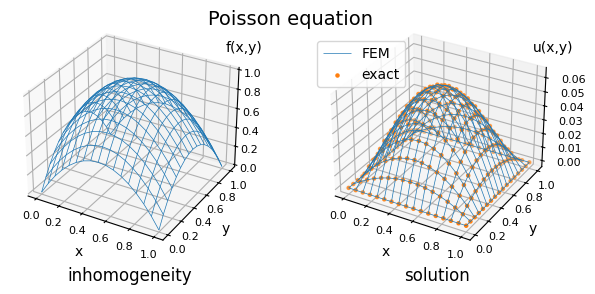

In [37]:
plotter3D(x, y, f1_mesh, u1, u1_ex_mesh)

In [38]:
# instantiate mesh
Nx = 16
Ny = 16
Lx = 1.0
Ly = 2.0

mesh = fem.TriangularMesh2D(Nx, Ny, Lx, Ly)
nodes, nx, ny = mesh.nodes, mesh.nx, mesh.ny
x = mesh.nodes[:,0].reshape(nx,ny)
y = mesh.nodes[:,1].reshape(nx,ny)

# inhomogeneity of the Poisson equation
def f2_gen(a, b, p):
    x = p[...,0]
    y = p[...,1]
    return (-(6*x  - 2*a)    * (y**4    - b**2*y**2)
            -(x**3 - a*x**2) * (12*y**2 - 2*b**2))
f2 = lambda p : f2_gen(Lx, Ly, p)
f2_mesh = f2(nodes).reshape(nx,ny)

# exact solution of the Poisson equation
def u2_gen(a, b, p):
    x = p[...,0]
    y = p[...,1]
    return (x**3 - a*x**2) * (y**4 - b**2*y**2)
u2_ex = lambda p : u2_gen(Lx, Ly, p)
u2_ex_mesh = u2_ex(nodes).reshape(nx,ny)

In [39]:
#solution of the linear system
A_mat  = fem.stiffn(mesh)
b_vec  = fem.fv_int(mesh, f2)
u2 = solve_banded((nx,nx), A_mat, b_vec).reshape(nx,ny)

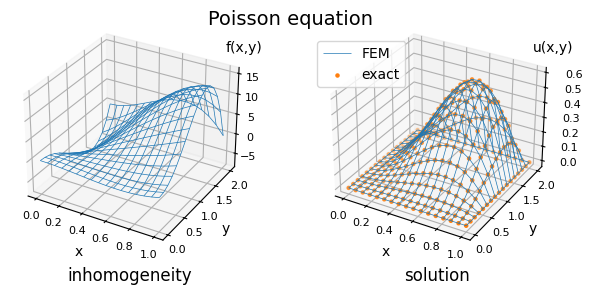

In [40]:
plotter3D(x, y, f2_mesh, u2, u2_ex_mesh)